<img src="images/GMIT logo.jpeg" width="800" align="center">

# GMIT simulated dataset

## Roisin Fallon

### Table of Contents

[ Python Libraries ](#lib)
[ Variables](#var)
   * [ Gender ](#gender)
   * [Age](#age)
   * [ Percent ](#percent)
   * [ Grade Description ](#grade)
   * [Course Type](#type)
   * [ Hours Studied per week  ](#hour)
   * [ GMIT moodle logon ](#login)
   
[Simulation  of the Dataset](#sim)

[Conclusion](#con)

[Bibliography](#bib)

<a name="lib"></a>
## Python Libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd


# Visualisation library
import seaborn as sns
# current version of seaborn creates warnings this will remove them
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
# To plot the graph embedded in the notebook
%matplotlib inline

import scipy.stats as stats
from scipy import stats

import random

In [2]:
# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (20, 12)
sns.set_style("whitegrid")

## Introduction

I have set a seed so the numbers wont change if the cell was executed on it own. 

<a name="var"></a>
## Variables

In [3]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

<a name="gender"></a>
###  Gender Variable


<img src="images/gender.jpg" width="600" align="center">


* Gender is a categorical variable in that it has two categories male and female and is of dicrete distribution
* For this simulation I attempted to get statistics for the GMIT campus which is based on 2017/2018 HEA <a href= https://hea.ie/statistics-archive/>[3] </a>
* In summary the male to female divide is 55.2% to 44.8% respectively

<b><u><i>Distribution Types: </i></u></b>
* As the gender variable has only 2 possible outcomes - male or female there is a number of different functions that can be used to generate the random sequence of variables. I will outline the possibilitis below and explain why I selected the choice function.

<b><u><i> Binomial Distribution:</i></u></b>

Each trial is independent of the others. A trial is considered independent if the outcome on one trial does not affect the outcome on other trials. Thus the probability of success (p) is the same on every trial. There are only two possible outcomes in a trial- either a success or a failure which is in keeping with the gender variable with only 2 outcomes: male and female. <a href= https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html>[4] </a>

$$ numpy.random.binomial(n, p, size=None) $$

* n denotes the number of trials
* p refers to the probability of each trial
* size refers to number of times tested

<b><u><i> Uniform Distribution:</i></u></b>

$$ numpy.random.uniform(low=0.0, high=1.0, size=None) $$

* Low: Refers to lower bound. Values Generated will be greater than or equal to low. Default is 0.
* High: Refers to upper bound. Values Generated will be less than high. Default is 1.
* Size: Output the shape. Default(none) will return single values. <a href=https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.uniform.html>[5] </a>

Uniform distributions is symmetric. These are probability distributions where any value within the given interval is equally likely to be drawn. Thus, the distribution is basically a straight line.
In uniform distribution the mean and median coincide. The reason I did not select this to generate a random sequence for the gender variable was due to the fact that the probability for male and female is not the same . In my case the number of males is sligtly higher, it is not equally likely that male or female will be selected. Thus I did not select this distribution type for the variable gender


<b><u><i> numpy.random.randint </i></u></b>

$$ numpy.random.randint(low, high=None, size=None, dtype='l') $$

randint function returns a random integer from low (inclusive) to high (exclusive), both of which must be integer type values.

Low: refers to the starting point i.e. smallest integer to be taken from the integer.
High: refers to the largest number to be drawn from the distribution. This value is optional so if not included the numbers generated will be [0, low].
Size: refers to shape of the output. This is optional and has a default value none which would return a single value.
dtype: default is integer <a href=https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html>[6] </a>

<i> Reasoning: The above functions were not selected as they use integers represent indices to the array where 1 represents Females and 2 was Males. Using these functions it would be recommended to convert the integer into strings as it is more readible for people who are using theses analytics and to keep the integers when performing calculations. 
    

<b><u><i> numpy.random.choice:</i></u></b>

$$ numpy.random.choice(a, size=None, replace=True, p=None) $$

* This function returns a random sample from the non-empty sequence. 
* Index Error occurs if no value (list or sequence) is passed into this function as you cannot make a selection from an empty sequence.
* This function selects a value from a give array, and repeats for the number of times specified. random.choices function is used when you want to choose multiple items out of a list including repeated. <a href=https://pynative.com/python-random-choice/>[2] </a>

<i> Reasoning</i> Choice was selected as it used strings and not numeric values like in the other distribution types. It also allows the inclusion of probability difference between males and females i.e. males account for 55.2% they are not evenly distributed.

In [4]:
# Define the gender variables
gender = ["Male", "Female"]

# the random.choice function lets us distribute the data to match the real world data 

df = pd.DataFrame(np.random.choice(gender, 500, p=[0.552, 0.448])) 

# Rename column
df.columns = ["Gender"] 

# There are 2 more ways we could generate random gender variables
# Male = 1 or Female = 2
# gender = np.random.binomial(1, 0.45, 1000)

# gender = np.random.randint(1, 3, 1000) 


In [5]:
# Print the first 5 values 

df.head()

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female


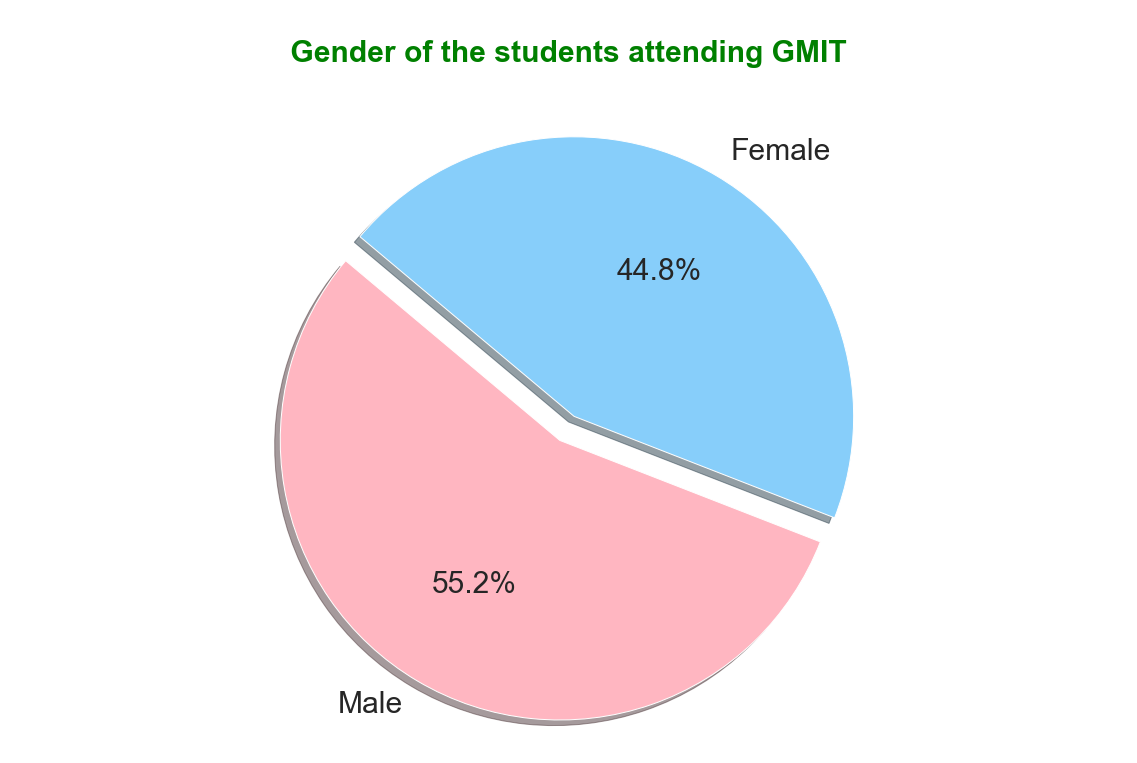

In [6]:
# Adapted from: https://pythonspot.com/matplotlib-pie-chart/

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.552, 0.448]
colors = ['lightpink', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\n Gender of the students attending GMIT \n", fontweight="bold", fontsize="30", color="g")

plt.axis('equal')
plt.show()


<i> This pie chart represents the distribution of males to females in the dataset. The bin size is 3 as it allows for a gap between the 2 bars. The number of males is 294 and the number of females is 206. </i>

<a name="age"></a>
### Age Variable 


<img src="images/age.jpg" width="600" align="center">

* Triangular method returns random floating numbers between 2 specified values. 
* The reason why I selected this method for Age is the ability to specify a third parameter called mode. The mode parameter allows the opportunity to weigh the possible outcomes towards one of the 2 parameters. <a href=https://kite.com/python/docs/random.triangular>[4] </a>
* Using the excel spreadsheet for GMIT 2017-2018 breaks down the number of students for each year, we can deduce that the mode for males and females is different. In this situation mode for males was 19 years and females was 30 years. Thus I seperated the age variable for males and females so it would better reflect the real life situation 

 <i> Further down I have explained why I did not use uniform distribution and decided to go for triangular! </i>

In [7]:
age = []


for row in df.Gender:
    if row in ["Female"]:
        age.append(np.random.triangular(17, 28, 60))      # (left, mode, right)
    else:
        age.append(np.random.triangular(17, 19, 60))      # (left, mode, right)

# Round the age for each person 
df["Age"] = np.round(age)

In [8]:
df.head()

,Gender,Age
0,Male,46.0
1,Female,41.0
2,Male,31.0
3,Female,25.0
4,Female,21.0


In [9]:
print("\n \n Mean Age for each Gender:")

pd.pivot_table(df, values='Age', index='Gender', aggfunc='mean', margins=True, margins_name='Total', fill_value=0)


 
 Mean Age for each Gender:


,Age
Gender,
Female,34.560
Male,32.492
Total,33.526


In [10]:
pd.pivot_table(df, values='Age', index='Gender', aggfunc='median', margins=True, margins_name='Total', fill_value=0)

,Age
Gender,
Female,32.5
Male,30.0
Total,32.0


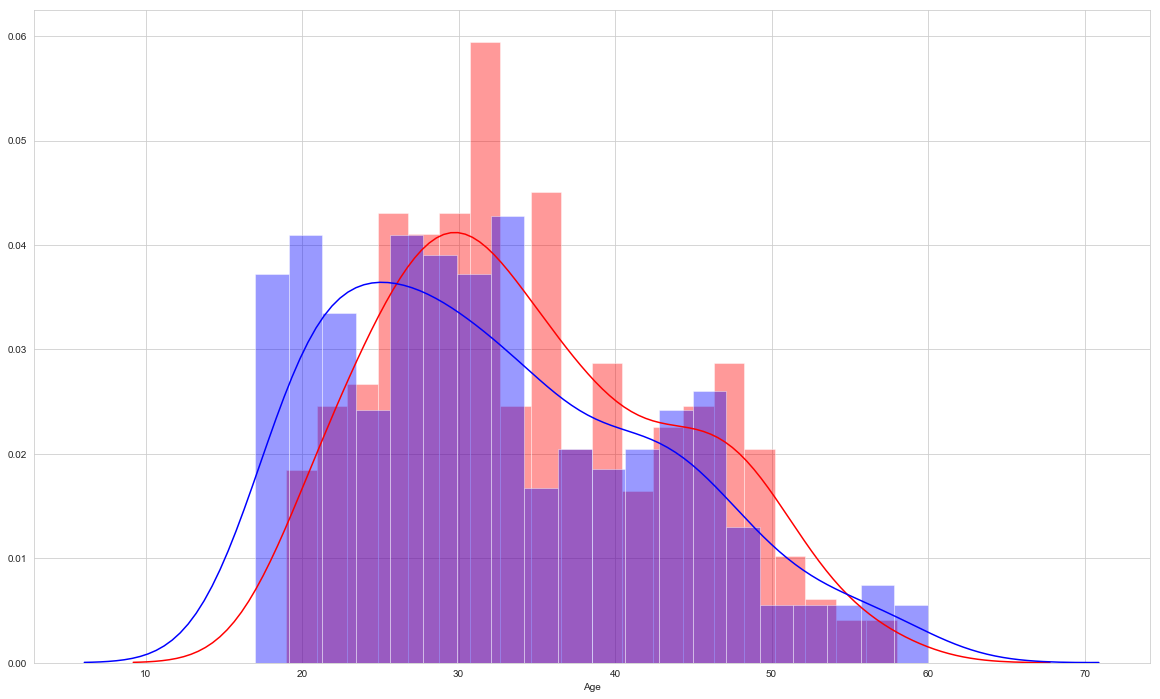

In [11]:
a = df.loc[df.loc[:,'Gender'] == "Female"]['Age']
b = df.loc[df.loc[:,'Gender'] == "Male"]['Age']

sns.distplot(a, color="r",bins=20, label='Female')
sns.distplot(b, color="b", bins=20, label='Male')

<i> Above we can see a distribution plot to show the distribution of Age for both genders </i> 

### Why I didn't use Uniform Distribution for the age variable

* Another option that could be used is uniform distribution or randint where every age is equally likely.
* The plot above does not accurately reflect the age of the student population. We can see that it is a uniform distribution where the number of people over the age of 50 and under the age of 30 is similar where in actual fact you would expect that the majority would be in the range of 18 - 24 years. 
* To further solidify why I feel this is not a good reflection of the expected data was the mean and median is 40. 
* Although mean can be skewed with the presence of outliers you would expect median (middle value) to be alot lower. 
* As a result I will not be using the randint function to generate random samples for age in this dataset.

Average age of the dataset using randint:  38.078
Average age of the dataset using randint:  38.0


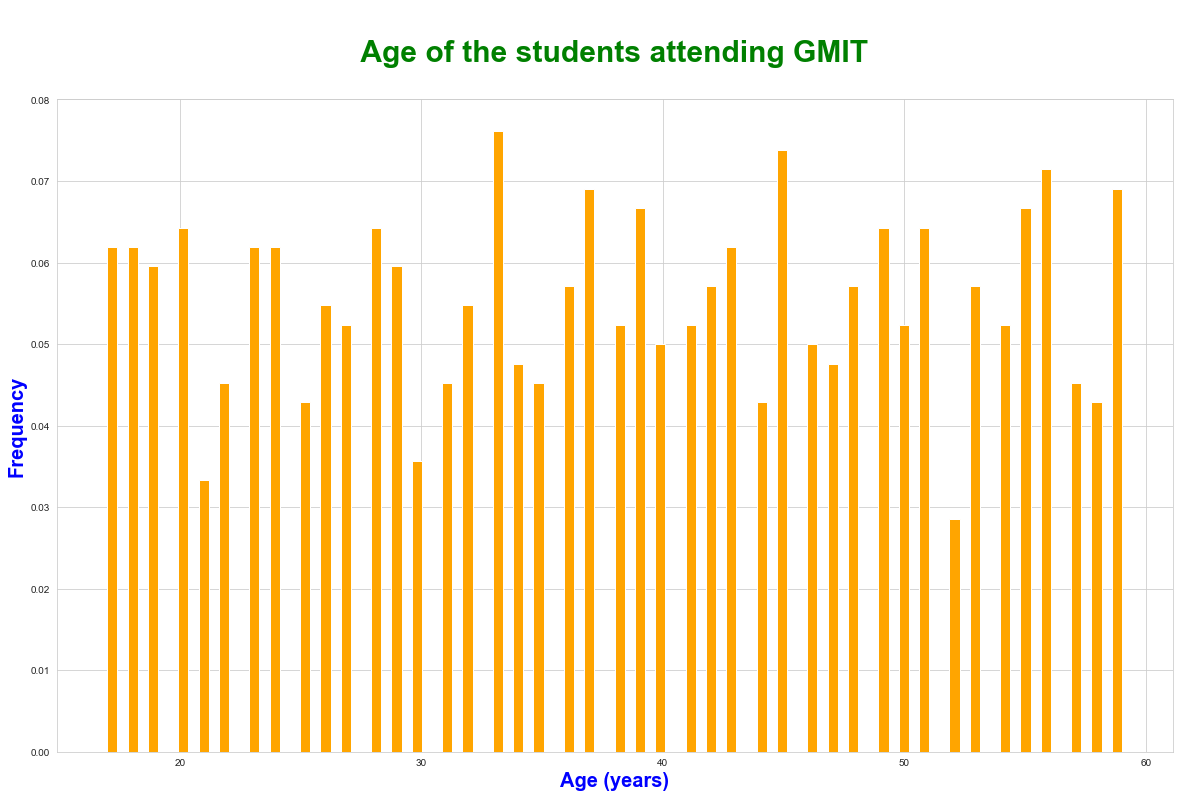

In [12]:
# Generate age between 18 and 60 years using randint 

np.random.seed(123456)                      # seed is used to ensure the data is reproducible
age1 = np.random.randint(17, 60, 1000) 
# print("age)

# Average age of the sample

print("Average age of the dataset using randint: ", np.mean(age1))

# Median age of dataset created using randint

print("Average age of the dataset using randint: ", np.median(age1))

# Histogram reflecting the age using the randint 
plt.hist(age1, bins= 100, density=True, facecolor='orange')
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("Age (years)", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Age of the students attending GMIT \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="percent"></a>

### Percent variable

Normal distribution is a better way to distribute the data for marks.
In order to reflect real life scenario Males and Females do not receive the same marks. According to 

In [13]:
# Adapted from: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

# To append or add another column to the dataframe created
percent = []

# Normal distribution of grades divided into genders to account for result variance between genders
for row in df.Gender:
    if row in ['Female']:
        percent.append(np.random.normal(60, 14))
    else:
        percent.append(np.random.normal(50, 14))

# Percent to 2 decimal places      
df["Percent"] = np.round((percent), 2)

In [14]:
df.head()

,Gender,Age,Percent
0,Male,46.0,40.19
1,Female,41.0,80.99
2,Male,31.0,35.55
3,Female,25.0,91.00
4,Female,21.0,95.73


<a name="grade"></a>
### Grade Description 


<table style="width:100%">
<tr>
<th style="width:25%">Classification of Level 8</th>
<th style="width:15%">Percentage Point Value (PPA) boundary values</th>
<th>Description</th>
</tr>

<tr>
<td>First Class Honours</td>
<td>70 – 100%</td>
<td>Achievement indicates that required for a Pass and in most respects is significantly and consistently beyond this</td>
</tr>

<tr>
<td>Second Class Honours Grade 1</td>
<td>60 – 69%</td>
<td>Achievement indicates that required for a Pass and in many respects is significantly beyond this</td>
</tr>

<tr>
<td>Second Class Honours Grade 2</td>
<td>50 – 59%</td>
<td>Achievement indicates that required for a Pass and in some respects is significantly beyond this</td>
</tr>

<tr>
<td>Pass</td>
<td>40 – 49%</td>
<td>Attains all the minimum intended programme learning outcomes</td>
</tr>

<tr>
<td>Marginal Fail </td>
<td>35 – 39%</td>
<td>Has not attained all the minimum intended programme learning outcomes. Within compensatable range.</td>
</tr>

<tr>
<td>Fail</td>
<td>0 – 34%</td>
<td>Has not attained all the minimum intended programme learning outcomes</td>
</tr>
</table> 
<a href=https://www.gmit.ie/sites/default/files/public/directorate/docs/code-practice-no3_1.pdf>GMIT Student Assessment: Marks and Standards page 25 </a>


In [15]:
def result(percent):
    if (percent >= 70.00) & (percent <= 100.00 ):
        return "First Class Honours"
    elif (percent >= 60.00) & (percent <= 69.99):
        return "Second Class Honors Grade 1 (2:1)" 
    elif (percent >= 50.00) & (percent <= 59.99):
        return "Second Class Honors Grade 2 (2:2)"
    elif (percent >= 40.00) & (percent <= 49.99):
        return "Pass"
    elif (percent >= 35.00) & (percent <= 39.99):
        return "Marginal Fail"
    else:
        return "Fail"

vfunction = np.vectorize(result)
result = vfunction(df["Percent"])  
df["Result"] = result 

In [16]:
df.head()

,Gender,Age,Percent,Result
0,Male,46.0,40.19,Pass
1,Female,41.0,80.99,First Class Honours
2,Male,31.0,35.55,Marginal Fail
3,Female,25.0,91.00,First Class Honours
4,Female,21.0,95.73,First Class Honours


<a name="type"></a>
### Course Type Variable

In [17]:
# In this instnce 86% is full time 
course = np.random.binomial(1, 0.877)
df["Course"] = course
df["Course"].replace({0:'Part Time', 1:'Full Time'}, inplace=True)

In [18]:
df.head()

,Gender,Age,Percent,Result,Course
0,Male,46.0,40.19,Pass,Full Time
1,Female,41.0,80.99,First Class Honours,Full Time
2,Male,31.0,35.55,Marginal Fail,Full Time
3,Female,25.0,91.00,First Class Honours,Full Time
4,Female,21.0,95.73,First Class Honours,Full Time


<a name="hour"></a>
### Hours Studied per week Variable

<img src="images/study.jpg" width="600" align="center">


In [19]:
hours = []

for row in df.Course:
    if row in ['Full Time']:
        hours.append(np.random.normal(25, 4)) 
    else:
        hours.append(np.random.normal(15, 4))
        
df["Study Hours"] = np.round(hours)

In [20]:
df.head()

,Gender,Age,Percent,Result,Course,Study Hours
0,Male,46.0,40.19,Pass,Full Time,30.0
1,Female,41.0,80.99,First Class Honours,Full Time,28.0
2,Male,31.0,35.55,Marginal Fail,Full Time,23.0
3,Female,25.0,91.00,First Class Honours,Full Time,34.0
4,Female,21.0,95.73,First Class Honours,Full Time,23.0


<a name="login"></a>
### GMIT Moodle login Variable

<img src="images/moodle.jpg" width="600" align="center">

In [21]:
login = []

for row in df.Course:
    if row in ['Full Time']:
        login.append(np.random.logistic(700, 60))            # (location/mean, median, and size) 
    else:
        login.append(np.random.logistic(800, 60))
        
df["Moodle Login"] = np.round(login)

In [22]:
df.head()

,Gender,Age,Percent,Result,Course,Study Hours,Moodle Login
0,Male,46.0,40.19,Pass,Full Time,30.0,442.0
1,Female,41.0,80.99,First Class Honours,Full Time,28.0,1034.0
2,Male,31.0,35.55,Marginal Fail,Full Time,23.0,306.0
3,Female,25.0,91.00,First Class Honours,Full Time,34.0,742.0
4,Female,21.0,95.73,First Class Honours,Full Time,23.0,551.0


### Relationship between Study Hours and Percent Achieved 

* Theoretically you would expect the more a student studies the better they do in exams.  

Text(0.5, 1.0, 'Relationship between Study Hours and Grade Achieved')

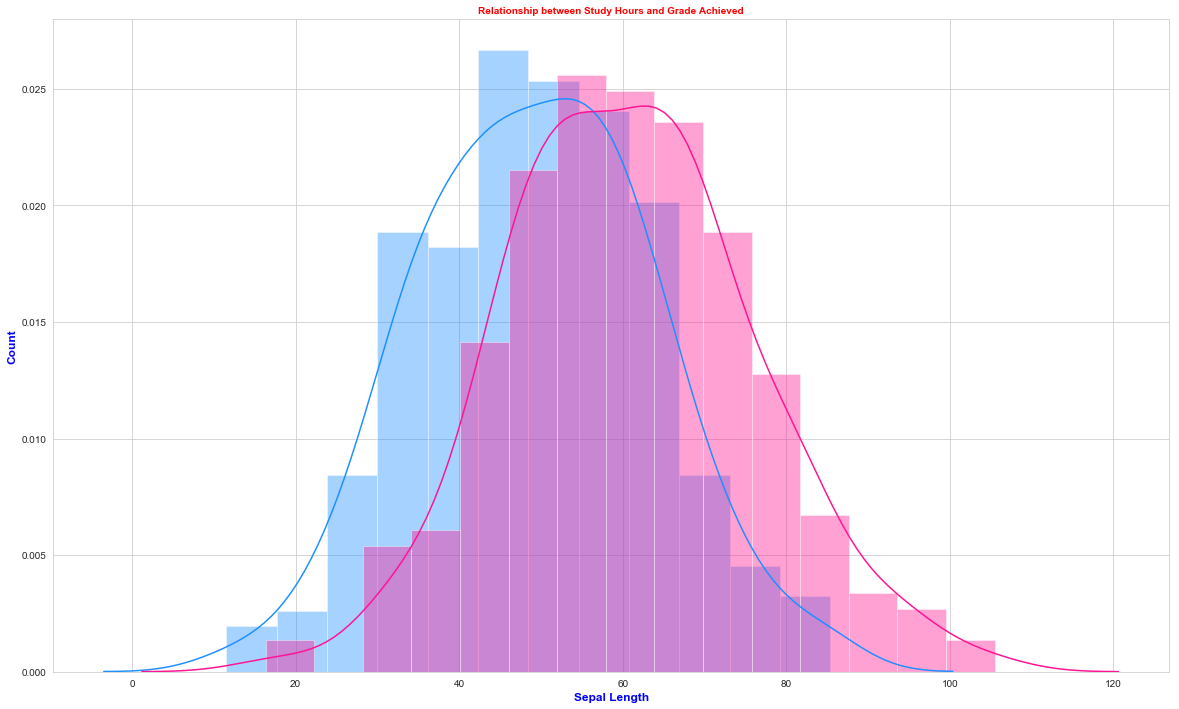

In [23]:
sns.distplot(df.loc[df.Gender=='Male', "Percent"] , color="dodgerblue", label="setosa")                 
sns.distplot(df.loc[df.Gender=='Female', "Percent"] , color="deeppink", label="virginica")              
plt.xlabel("Sepal Length", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Count", fontweight="bold", fontsize="12", color="b")                                               
plt.title("Relationship between Study Hours and Grade Achieved", fontweight="bold", fontsize="10", color="r")  

In [24]:
df.groupby("Gender").describe()

Age                                                   Moodle Login  \
        count    mean        std   min   25%   50%    75%   max        count   
Gender                                                                         
Female  250.0  34.560   9.297320  19.0  27.0  32.5  41.75  58.0        250.0   
Male    250.0  32.492  10.366474  17.0  24.0  30.0  40.00  60.0        250.0   

                 ...   Percent         Study Hours                          \
           mean  ...       75%     max       count    mean       std   min   
Gender           ...                                                         
Female  694.212  ...   70.1150  105.47       250.0  24.544  4.119703  13.0   
Male    702.864  ...   59.3675   85.38       250.0  25.452  3.867236  15.0   

                                
         25%   50%   75%   max  
Gender                          
Female  22.0  24.0  28.0  39.0  
Male    23.0  25.0  28.0  35.0  

[2 rows x 32 columns]

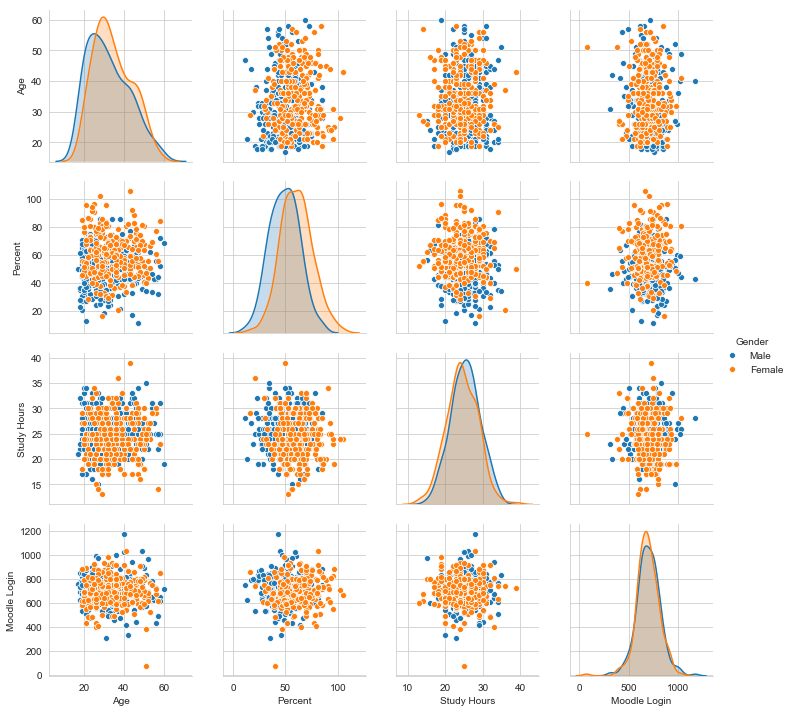

In [25]:
sns.pairplot(df, hue="Gender")

<a name="bib"></a>
## Bibliography:
1. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
2. Vishal. “Python Random.choice() to Choose Random Element from List, String, Array.” pynative. pynative, October 15, 2019. https://pynative.com/python-random-choice/.
5. PAGE 25:   https://www.gmit.ie/sites/default/files/public/directorate/docs/code-practice-no3_1.pdf

Statistica throughout project ccessed : https://hea.ie/assets/uploads/2019/01/Higher-Education-Authority-Key-Facts-Figures-2017-18.pdf